# Rotating Cartesian Coordinates with Python

Notebook is available here:
   https://github.com/MD-Troyer/blog-notebooks

It is a common need to rotate cartesian coordinates about some other cartesian point. This is often necessary in archaeology to correct total station (EDM) measurements which are located on a local, arbitrary grids and later must be rectified with UTM grids in order to yield global (non-local) positions. 

Here is how to implement a cartesian point rotation with an arbitrary point series, origin, and angle in Python. 

In [1]:
# Standard imports

from __future__ import division
import numpy as np
import pandas as pd
import math

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

Lets create an arbitrary point series where both the x and y values are drawn from a standard normal with a mean 10 and standard deviation of 1. Lets then apply an angular correction of 15 degrees about the origin point at (10, 10).

In [2]:
points = [(np.random.randn() + 10, np.random.randn() + 10) for i in range(10)]
origin = (10, 10)
angle = 15

In [3]:
def rotate_cartesian_points(points, origin, angle):
    """
    Takes a list of points, an origin point, and an angle in degrees and 
    rotates the points about the origin.
    """
   
    # Get the origin x and y individually
    X0 = origin[0]
    Y0 = origin[1]
        
    # Reverse angle so our adjustment moves the points in the right direction
    angle = angle * (-1.0)
    
    # math.pi / 180.0 * angle yields radians
    
    # The cosine of our angular adjustment
    cos_XY = math.cos(math.pi / 180.0 * angle)
    
    # The sine of our angular adjustment
    sin_XY = math.sin(math.pi / 180.0 * angle)
    
    rotated_points = []
    
    # For each point
    for j in range(len(points)):
        
        # Get the x difference
        X1 = points[j][0] - X0
        
        # Get the y difference
        Y1 = points[j][1] - Y0
        
        # The general formula for calculating a new (x', y') point following an
        # angular transformation (angle) to a source point (x, y) is:
        # x' = x * cos(a) - y * sin(a)
        # y' = x * sin(a) + y * cos(a)
        
        X = (X1 * cos_XY) - (Y1 * sin_XY)
        Y = (X1 * sin_XY) + (Y1 * cos_XY)
        
        # X and Y are corrections on the original point-less-origin diference
        # Add the origin to scale back to original data space 
        point = [X + X0, Y + Y0]
        rotated_points.append(point)
        
    return rotated_points

Lets plot the source and rotated points to see the transformation in action: 

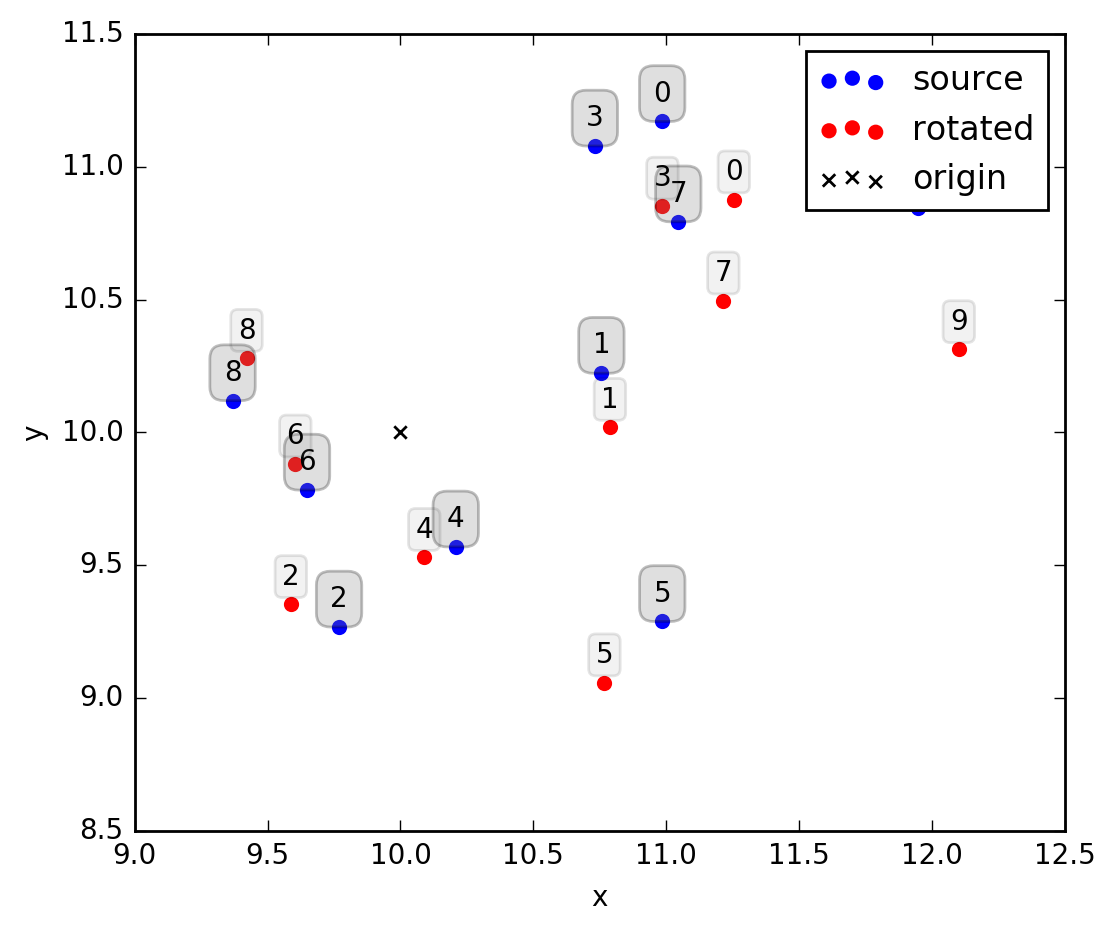

In [4]:
def rotate_and_plot(points, origin, angle):
    labels = [i for i in range(len(points))]
    
    # Get the rotated points
    rotated = rotate_cartesian_points(points, origin, angle)
    
    # sort the lists points into a lists of xs and lists of ys
    pts_xs, pts_ys = zip(*points)
    rot_xs, rot_ys = zip(*rotated)
    
    # Plot the source, rotated, and origin points
    fig = plt.figure(figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(pts_xs, pts_ys, marker='o', color='b', label='source')
    plt.scatter(rot_xs, rot_ys, marker='o', color='r', label='rotated')
    plt.scatter(origin[0], origin[1], marker='x', color='k', label='origin')
    plt.xlabel('x'); plt.ylabel('y')
    plt.axes().set_aspect('equal')
    
    # Label the source points
    for label, x, y in zip(labels, pts_xs, pts_ys):
        plt.annotate(label, xy=(x, y), xytext=(0, 10),
            textcoords='offset points', ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.25))
        
    # Label the rotated points
    for label, x, y in zip(labels, rot_xs, rot_ys):
        plt.annotate(label, xy=(x, y), xytext=(0, 10),
            textcoords='offset points', ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.25', fc='grey', alpha=0.1))
        
    plt.legend()
    plt.show()
    
rotate_and_plot(points, origin, angle)

Success!